
#  オペレーティングシステム 演習 09
#  メモリとアドレス


名前と学生証番号を書け. Enter your name and student ID.

 * 名前 Name:
 * 学生証番号 Student ID:


# 1. 始めに
* プログラム言語の「変数」や「配列」など, 「代入して値を覚えておく」機能は, 当然のことながらコンピュータ「メモリ」を使って実現されている
* 従って当然ながら「変数」や「配列」にはメモリの中のある領域---番地(アドレス)の範囲---が対応しており, 異なる変数・配列に割り当てられている番地の範囲は重ならないようになっている(プログラミング言語処理系の役割)

# 2. 変数・配列の番地を表示
* C/C++言語は変数や配列がどのアドレスに割り当てられているのかをあからさまに知ることが出来る<font color="blue">(&演算子)</font>
* &演算子は, 「代入文の左辺に書けるもの」に適用することが出来, 「その代入文の左辺に対応するアドレス」を意味する
  * 例えばxが変数 (e.g., int x;)なら, &x は変数xが割り当てられているアドレス. xへの代入は, そのアドレスへ値を書き込むこと(store命令)で実現される
  * なお, xが配列 (e.g., int x[10];)の場合, &を適用しなくても, つまり, xだけで, 配列xが割り当てられているアドレス(先頭要素のアドレス)という意味になる
* <font color="blue">アドレスの正体は, 機械語レベルでは単なる整数</font>であり, C/C++言語でもそれを整数として表示することも出来る
* 実用的な意味はないが, 「変数や配列にどうアドレスが対応しているか」を知るには役に立つのでそれをやってみる

## 2-1. 大域変数・大域配列の場合
* C言語の大域{変数・配列}とは, ファイルのトップレベル(関数定義の外側)に書かれている変数, 配列の定義のこと


In [1]:
%%writefile global.c
#include <stdio.h>
/* 大域変数 */
int x;
/* 大域配列 */
int c[100];
double d[200];
/* 大域変数 */
int i;

int main() {
  printf("x:     %ld\n", &x);
  printf("c:     %ld\n", c);
  printf("c[50]: %ld\n", &c[50]);
  printf("d:     %ld\n", d);
  printf("d[50]: %ld\n", &d[50]);
  printf("i:     %ld\n", &i);
}

Writing global.c


In [2]:
gcc -Wall -o global global.c

global.c: In function ‘main’:
global.c:11:20: warning: format ‘%ld’ expects argument of type ‘long int’, but argument 2 has type ‘int *’ []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wformat=-Wformat=]8;;]
   11 |   printf("x:     %ld\n", &x);
      |                  ~~^     ~~
      |                    |     |
      |                    |     int *
      |                    long int
      |                  %ls
global.c:12:20: warning: format ‘%ld’ expects argument of type ‘long int’, but argument 2 has type ‘int *’ []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wformat=-Wformat=]8;;]
   12 |   printf("c:     %ld\n", c);
      |                  ~~^     ~
      |                    |     |
      |                    |     int *
      |                    long int
      |                  %ls
global.c:13:20: warning: format ‘%ld’ expects argument of type ‘long int’, but argument 2 has type ‘int *’ []8;;https://gcc.gnu.org/onlinedocs/


* コンパイラが「ポインタを整数として表示しようとしている」という旨の警告を出す
* 通常はそんなことはしないので警告はもっともなのだが, ここではポインタは所詮整数であることをわかった上でやっているので気にしなくて良い
* ポインタをprintfで表示するには通常`%p`を使うのだが実際には, <font color="blue">16進数で表示していると言うだけで, 表示される数自身は全く同じ</font>
* なおこの警告を消すには以下のどちらかをすれば良い
  * gccに`-Wno-format` オプションを与える
  * アドレスをprintfに渡す際にlongにキャストする`(long)&x`のように

In [4]:
gcc -Wall -Wno-format -o global global.c

In [5]:
./global

x:     94675768369216
c:     94675768369248
c[50]: 94675768369448
d:     94675768369664
d[50]: 94675768370064
i:     94675768371264


* 結果を観察すると, cとc[50]のアドレスは200離れているはずである
  * それはint 1つのサイズ4バイトで, c[50]はcの先頭から50要素分離れたところにあることから, これは必然の結果 (4 $\times 50 = 200$)
* 同様にdとd[50]のアドレスは400離れている (double 1つのサイズ8バイト $\times 50 = 400$)
  * プログラム言語が<font color="blue">どうやって「配列」というものを実現しているのかのおおよその正体</font>がこれである
* 4つの変数と配列がどの順番に配置されているか, 間が何バイトあいているか見てみよ(どうやらd, x, c, iの順)

* <font color="purple">以下で配列の要素数や要素の型を変えるなどして, 変数のアドレス(の間の距離)がどう変化するかを観察せよ</font>


In [6]:
%%writefile global.c
#include <stdio.h>
/* 大域変数 */
int x;
/* 大域配列 */
int c[100];
double d[200];
/* 大域変数 */
int i;

int main() {
  printf("x:     %ld\n", &x);
  printf("c:     %ld\n", c);
  printf("c[50]: %ld\n", &c[50]);
  printf("d:     %ld\n", d);
  printf("d[50]: %ld\n", &d[50]);
  printf("i:     %ld\n", &i);
}

Overwriting global.c


In [7]:
gcc -Wall -Wno-format -o global global.c

In [8]:
./global

x:     94348538597440
c:     94348538597472
c[50]: 94348538597672
d:     94348538597888
d[50]: 94348538598288
i:     94348538599488


* <font color="blue">注</font>
* なお, 上記のコマンドを何度も実行すると, 毎回異なるアドレスが表示される
* これは別に, はじめの実行で使われたアドレスが使われていて2回目では使えないとか, そういう理由ではなく, セキュリティのためにOSが変数のアドレスへの配置を非決定的にしている(address space randomization)から
* これを抑止するには以下のようにする. `-R`というオプションは, address space randomizationを抑止するというオプション
* これで, 何度実行しても同じアドレスが表示されるようになる

In [9]:
setarch $(uname -m) -R ./global

x:     93824992247872
c:     93824992247904
c[50]: 93824992248104
d:     93824992248320
d[50]: 93824992248720
i:     93824992249920


* 同時に実行しても同じアドレスが表示される
* この仕組みは後ほど

In [10]:
setarch $(uname -m) -R ./global & 
setarch $(uname -m) -R ./global & 
setarch $(uname -m) -R ./global &
wait

[1] 3011773
x:     93824992247872
c:     93824992247904
c[50]: 93824992248104
d:     93824992248320
d[50]: 93824992248720
i:     93824992249920
[2] 3011775
[1]   Done                    setarch $(uname -m) -R ./global
x:     93824992247872
c:     93824992247904
c[50]: 93824992248104
d:     93824992248320
d[50]: 93824992248720
i:     93824992249920
[3] 3011777
[2]   Done                    setarch $(uname -m) -R ./global
x:     93824992247872
c:     93824992247904
c[50]: 93824992248104
d:     93824992248320
d[50]: 93824992248720
i:     93824992249920



* <font color="purple">おまけ:</font> 以下のプログラムでもcの400バイト先にiがあるとすると, 以下のプログラムで何が起きるか想像して実行してみよ
* <font color="red">警告:</font> プログラムが止まらなかったらどうやって止めるのか思い出してから実行せよ (以下では保険として timeout コマンドで20秒立ったら止まるようにしている)


In [ ]:
%%writefile global_quiz.c
#include <stdio.h>
#include <stdio.h>
/* 大域配列 */
int c[100];
/* 大域変数i */
int i;

int main() {
  for (i = 0; i <= 100; i++) {
    c[i] = 0;
    // printf("done %d\n", i);
  }
  printf("done\n");
}

In [ ]:
gcc -Wall -o global_quiz global_quiz.c

In [25]:
timeout 20 ./global_quiz

done 0
done 1
done 2
done 3
done 4
done 5
done 6
done 7
done 8
done 9
done 10
done 11
done 12
done 13
done 14
done 15
done 16
done 17
done 18
done 19
done 20
done 21
done 22
done 23
done 24
done 25
done 26
done 27
done 28
done 29
done 30
done 31
done 32
done 33
done 34
done 35
done 36
done 37
done 38
done 39
done 40
done 41
done 42
done 43
done 44
done 45
done 46
done 47
done 48
done 49
done 50
done 51
done 52
done 53
done 54
done 55
done 56
done 57
done 58
done 59
done 60
done 61
done 62
done 63
done 64
done 65
done 66
done 67
done 68
done 69
done 70
done 71
done 72
done 73
done 74
done 75
done 76
done 77
done 78
done 79
done 80
done 81
done 82
done 83
done 84
done 85
done 86
done 87
done 88
done 89
done 90
done 91
done 92
done 93
done 94
done 95
done 96
done 97
done 98
done 99
done 0
done 1
done 2
done 3
done 4
done 5
done 6
done 7
done 8
done 9
done 10
done 11
done 12
done 13
done 14
done 15
done 16
done 17
done 18
done 19
done 20
done 21
done 22
done 23
done 24
done 25
done 26
done

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



done 17
done 18
done 19
done 20
done 21
done 22
done 23
done 24
done 25
done 26
done 27
done 28
done 29
done 30
done 31
done 32
done 33
done 34
done 35
done 36
done 37
done 38
done 39
done 40
done 41
done 42
done 43
done 44
done 45
done 46
done 47
done 48
done 49
done 50
done 51
done 52
done 53
done 54
done 55
done 56
done 57
done 58
done 59
done 60
done 61
done 62
done 63
done 64
done 65
done 66
done 67
done 68
done 69
done 70
done 71
done 72
done 73
done 74
done 75
done 76
done 77
done 78
done 79
done 80
done 81
done 82
done 83
done 84
done 85
done 86
done 87
done 88
done 89
done 90
done 91
done 92
done 93
done 94
done 95
done 96
done 97
done 98
done 99
done 0
done 1
done 2
done 3
done 4
done 5
done 6
done 7
done 8
done 9
done 10
done 11
done 12
done 13
done 14
done 15
done 16
done 17
done 18
done 19
done 20
done 21
done 22
done 23
done 24
done 25
done 26
done 27
done 28
done 29
done 30
done 31
done 32
done 33
done 34
done 35
done 36
done 37
done 38
done 39
done 40
done 41
done 42
do

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



done 2
done 3
done 4
done 5
done 6
done 7
done 8
done 9
done 10
done 11
done 12
done 13
done 14
done 15
done 16
done 17
done 18
done 19
done 20
done 21
done 22
done 23
done 24
done 25
done 26
done 27
done 28
done 29
done 30
done 31
done 32
done 33
done 34
done 35
done 36
done 37
done 38
done 39
done 40
done 41
done 42
done 43
done 44
done 45
done 46
done 47
done 48
done 49
done 50
done 51
done 52
done 53
done 54
done 55
done 56
done 57
done 58
done 59
done 60
done 61
done 62
done 63
done 64
done 65
done 66
done 67
done 68
done 69
done 70
done 71
done 72
done 73
done 74
done 75
done 76
done 77
done 78
done 79
done 80
done 81
done 82
done 83
done 84
done 85
done 86
done 87
done 88
done 89
done 90
done 91
done 92
done 93
done 94
done 95
done 96
done 97
done 98
done 99
done 0
done 1
done 2
done 3
done 4
done 5
done 6
done 7
done 8
done 9
done 10
done 11
done 12
done 13
done 14
done 15
done 16
done 17
done 18
done 19
done 20
done 21
done 22
done 23
done 24
done 25
done 26
done 27
done 28
do

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



done 51
done 52
done 53
done 54
done 55
done 56
done 57
done 58
done 59
done 60
done 61
done 62
done 63
done 64
done 65
done 66
done 67
done 68
done 69
done 70
done 71
done 72
done 73
done 74
done 75
done 76
done 77
done 78
done 79
done 80
done 81
done 82
done 83
done 84
done 85
done 86
done 87
done 88
done 89
done 90
done 91
done 92
done 93
done 94
done 95
done 96
done 97
done 98
done 99
done 0
done 1
done 2
done 3
done 4
done 5
done 6
done 7
done 8
done 9
done 10
done 11
done 12
done 13
done 14
done 15
done 16
done 17
done 18
done 19
done 20
done 21
done 22
done 23
done 24
done 25
done 26
done 27
done 28
done 29
done 30
done 31
done 32
done 33
done 34
done 35
done 36
done 37
done 38
done 39
done 40
done 41
done 42
done 43
done 44
done 45
done 46
done 47
done 48
done 49
done 50
done 51
done 52
done 53
done 54
done 55
done 56
done 57
done 58
done 59
done 60
done 61
done 62
done 63
done 64
done 65
done 66
done 67
done 68
done 69
done 70
done 71
done 72
done 73
done 74
done 75
done 76
do

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



done 61
done 62
done 63
done 64
done 65
done 66
done 67
done 68
done 69
done 70
done 71
done 72
done 73
done 74
done 75
done 76
done 77
done 78
done 79
done 80
done 81
done 82
done 83
done 84
done 85
done 86
done 87
done 88
done 89
done 90
done 91
done 92
done 93
done 94
done 95
done 96
done 97
done 98
done 99
done 0
done 1
done 2
done 3
done 4
done 5
done 6
done 7
done 8
done 9
done 10
done 11
done 12
done 13
done 14
done 15
done 16
done 17
done 18
done 19
done 20
done 21
done 22
done 23
done 24
done 25
done 26
done 27
done 28
done 29
done 30
done 31
done 32
done 33
done 34
done 35
done 36
done 37
done 38
done 39
done 40
done 41
done 42
done 43
done 44
done 45
done 46
done 47
done 48
done 49
done 50
done 51
done 52
done 53
done 54
done 55
done 56
done 57
done 58
done 59
done 60
done 61
done 62
done 63
done 64
done 65
done 66
done 67
done 68
done 69
done 70
done 71
done 72
done 73
done 74
done 75
done 76
done 77
done 78
done 79
done 80
done 81
done 82
done 83
done 84
done 85
done 86
do

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



done 9
done 10
done 11
done 12
done 13
done 14
done 15
done 16
done 17
done 18
done 19
done 20
done 21
done 22
done 23
done 24
done 25
done 26
done 27
done 28
done 29
done 30
done 31
done 32
done 33
done 34
done 35
done 36
done 37
done 38
done 39
done 40
done 41
done 42
done 43
done 44
done 45
done 46
done 47
done 48
done 49
done 50
done 51
done 52
done 53
done 54
done 55
done 56
done 57
done 58
done 59
done 60
done 61
done 62
done 63
done 64
done 65
done 66
done 67
done 68
done 69
done 70
done 71
done 72
done 73
done 74
done 75
done 76
done 77
done 78
done 79
done 80
done 81
done 82
done 83
done 84
done 85
done 86
done 87
done 88
done 89
done 90
done 91
done 92
done 93
done 94
done 95
done 96
done 97
done 98
done 99
done 0
done 1
done 2
done 3
done 4
done 5
done 6
done 7
done 8
done 9
done 10
done 11
done 12
done 13
done 14
done 15
done 16
done 17
done 18
done 19
done 20
done 21
done 22
done 23
done 24
done 25
done 26
done 27
done 28
done 29
done 30
done 31
done 32
done 33
done 34
don

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



done 64
done 65
done 66
done 67
done 68
done 69
done 70
done 71
done 72
done 73
done 74
done 75
done 76
done 77
done 78
done 79
done 80
done 81
done 82
done 83
done 84
done 85
done 86
done 87
done 88
done 89
done 90
done 91
done 92
done 93
done 94
done 95
done 96
done 97
done 98
done 99
done 0
done 1
done 2
done 3
done 4
done 5
done 6
done 7
done 8
done 9
done 10
done 11
done 12
done 13
done 14
done 15
done 16
done 17
done 18
done 19
done 20
done 21
done 22
done 23
done 24
done 25
done 26
done 27
done 28
done 29
done 30
done 31
done 32
done 33
done 34
done 35
done 36
done 37
done 38
done 39
done 40
done 41
done 42
done 43
done 44
done 45
done 46
done 47
done 48
done 49
done 50
done 51
done 52
done 53
done 54
done 55
done 56
done 57
done 58
done 59
done 60
done 61
done 62
done 63
done 64
done 65
done 66
done 67
done 68
done 69
done 70
done 71
done 72
done 73
done 74
done 75
done 76
done 77
done 78
done 79
done 80
done 81
done 82
done 83
done 84
done 85
done 86
done 87
done 88
done 89
do

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



done 64
done 65
done 66
done 67
done 68
done 69
done 70
done 71
done 72
done 73
done 74
done 75
done 76
done 77
done 78
done 79
done 80
done 81
done 82
done 83
done 84
done 85
done 86
done 87
done 88
done 89
done 90
done 91
done 92
done 93
done 94
done 95
done 96
done 97
done 98
done 99
done 0
done 1
done 2
done 3
done 4
done 5
done 6
done 7
done 8
done 9
done 10
done 11
done 12
done 13
done 14
done 15
done 16
done 17
done 18
done 19
done 20
done 21
done 22
done 23
done 24
done 25
done 26
done 27
done 28
done 29
done 30
done 31
done 32
done 33
done 34
done 35
done 36
done 37
done 38
done 39
done 40
done 41
done 42
done 43
done 44
done 45
done 46
done 47
done 48
done 49
done 50
done 51
done 52
done 53
done 54
done 55
done 56
done 57
done 58
done 59
done 60
done 61
done 62
done 63
done 64
done 65
done 66
done 67
done 68
done 69
done 70
done 71
done 72
done 73
done 74
done 75
done 76
done 77
done 78
done 79
done 80
done 81
done 82
done 83
done 84
done 85
done 86
done 87
done 88
done 89
do

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



done 0
done 1
done 2
done 3
done 4
done 5
done 6
done 7
done 8
done 9
done 10
done 11
done 12
done 13
done 14
done 15
done 16
done 17
done 18
done 19
done 20
done 21
done 22
done 23
done 24
done 25
done 26
done 27
done 28
done 29
done 30
done 31
done 32
done 33
done 34
done 35
done 36
done 37
done 38
done 39
done 40
done 41
done 42
done 43
done 44
done 45
done 46
done 47
done 48
done 49
done 50
done 51
done 52
done 53
done 54
done 55
done 56
done 57
done 58
done 59
done 60
done 61
done 62
done 63
done 64
done 65
done 66
done 67
done 68
done 69
done 70
done 71
done 72
done 73
done 74
done 75
done 76
done 77
done 78
done 79
done 80
done 81
done 82
done 83
done 84
done 85
done 86
done 87
done 88
done 89
done 90
done 91
done 92
done 93
done 94
done 95
done 96
done 97
done 98
done 99
done 0
done 1
done 2
done 3
done 4
done 5
done 6
done 7
done 8
done 9
done 10
done 11
done 12
done 13
done 14
done 15
done 16
done 17
done 18
done 19
done 20
done 21
done 22
done 23
done 24
done 25
done 26
done

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)




* 大域変数や配列は, プログラム起動時(プロセス立ち上げ時)にそのアドレスが定まり, その関係はそのプロセスが終了するまで変わることはない
* 言い換えればそれらの変数や配列のアドレスは常に同じであるし, それらのアドレスが他の目的に使われることはない
* これは, 大域変数や配列がそのプロセス実行中, ずっと有効であるという, 大域変数や配列の意味を考えれば頷けるものである

## 2-2. 局所変数・局所配列の場合
* <font color="blue">局所変数・局所配列は, Cの文法上は, 関数定義の中で定義されているもの</font>であり, 関数の引数もそれに含まれる
* 例えば以下は上記とほぼ同じことを局所変数・配列でやってみたもの


In [ ]:
%%writefile local.c
#include <stdio.h>

int main() {
  /* 局所変数 */
  int x;
  /* 局所配列 */
  int c[100];
  double d[200];
  /* 局所変数 */
  int i;
  printf("x:     %ld\n", &x);
  printf("c:     %ld\n", c);
  printf("c[50]: %ld\n", &c[50]);
  printf("d:     %ld\n", d);
  printf("d[50]: %ld\n", &d[50]);
  printf("i:     %ld\n", &i);
}

In [ ]:
gcc -Wall -Wno-format -o local local.c

In [ ]:
./local


* 局所変数は, 大域変数のように, 名前からアドレスを一意に決めることは出来ない
* なぜならば同じ変数の名前であっても, 現れる関数が違えばそれは「異なる」(別の値を覚えさせることができる)変数だから
* 以下で同じxという変数なのに片方は10, 片方は20を「覚えている」のはそれらに別のアドレスを割り当てているからにほかならない


In [26]:
%%writefile local_fun.c
#include <stdio.h>

void g() {
  int x = 20;
  printf("x@g : %ld = %d\n", &x, x);
}

void f() {
  int x = 10;
  g();
  printf("x@f : %ld = %d\n", &x, x);
}

int main() {
  f();
  return 0;
}

Writing local_fun.c


In [27]:
gcc -Wall -Wno-format -o local_fun local_fun.c

In [28]:
./local_fun

x@g : 140727294699732 = 20
x@f : 140727294699764 = 10


* 現れる関数が違えば異なる変数というのは不正確な言い方で, 同じ関数であっても, <font color="blue">関数「呼び出し」が違えば異なる変数</font>
* 典型的には再帰呼び出しをする関数の場合

In [29]:
%%writefile local_fact.c
#include <stdio.h>

#include <stdlib.h>
int g;
long fact(long n) {
  printf("g : %ld\n", (long)&g);
  printf("n@fact(%ld) : %ld\n", n, (long)&n);
  if (n == 0) {
    return 1;
  } else {
    long r = fact(n - 1);
    printf("r@fact(%ld) : %ld\n", n, (long)&r);
    return n * r;
  }
}

int main(int argc, char ** argv) {
  long n = (argc > 1 ? atol(argv[1]) : 10);
  long x = fact(n);
  printf("fact(%ld) = %ld\n", n, x);
  return 0;
}

Writing local_fact.c


In [30]:
gcc -Wall -Wno-format -o local_fact local_fact.c

In [31]:
./local_fact

g : 94701561171988
n@fact(10) : 140732337474376
g : 94701561171988
n@fact(9) : 140732337474328
g : 94701561171988
n@fact(8) : 140732337474280
g : 94701561171988
n@fact(7) : 140732337474232
g : 94701561171988
n@fact(6) : 140732337474184
g : 94701561171988
n@fact(5) : 140732337474136
g : 94701561171988
n@fact(4) : 140732337474088
g : 94701561171988
n@fact(3) : 140732337474040
g : 94701561171988
n@fact(2) : 140732337473992
g : 94701561171988
n@fact(1) : 140732337473944
g : 94701561171988
n@fact(0) : 140732337473896
r@fact(1) : 140732337473952
r@fact(2) : 140732337474000
r@fact(3) : 140732337474048
r@fact(4) : 140732337474096
r@fact(5) : 140732337474144
r@fact(6) : 140732337474192
r@fact(7) : 140732337474240
r@fact(8) : 140732337474288
r@fact(9) : 140732337474336
r@fact(10) : 140732337474384
fact(10) = 3628800


* fact(10)がfact(9)を呼び, それがfact(8)を呼び, それがfact(7)を呼び, ... としているがそれぞれに別の領域が割り当てられているはずで, その様子は表示されているアドレス(隣り合うアドレスの差)を観察すると「なんとなく」わかるだろう
* 対比としてあえて大域変数gを導入してそのアドレスも表示している

* 以下は可視化のためのコード

In [32]:
#!/usr/bin/python3
import sys
import re
import matplotlib.pyplot as plt
import numpy as np

def read_dat(dat):
    pat = re.compile("(?P<var>[A-Za-z0-9_]+)@(?P<fun>[A-Za-z0-9_]+)\([A-Za-z0-9_]*\) *: *(?P<addr>\d+)")
    log = {}
    with open(dat) as fp:
        idx = 0
        for line in fp:
            m = pat.match(line)
            if not m:
                # sys.stderr.write("warning: ignore line [%s]\n" % line.rstrip())
                continue
            var = m.group("var")
            fun = m.group("fun")
            addr = int(m.group("addr"))
            if var not in log:
                log[var] = []
            log[var].append((idx, addr))
            idx += 1
    return log
    
def addrs_plt(dat):
    log = read_dat(dat)
    nvars = len(log)
    cmap = plt.cm.get_cmap('RdYlGn', nvars)
    A0 = min(min(addr for _, addr in addrs) for addrs in log.values())
    lines = []
    fig, ax = plt.subplots()
    for i, (var, addrs) in enumerate(sorted(log.items())):
        I = [line_no for line_no, _ in addrs]
        A = [addr for _, addr in addrs]
        color = cmap(i)
        lines.extend(ax.plot(I, A, marker='o', label=var, color=color))
    ax.autoscale()
    ax.legend()
    plt.title("addrs (%s)" % dat)
    plt.xlabel("line")
    plt.ylabel("addrs")
    plt.show()

def main():
    dat = sys.argv[1]
    addrs_plt(dat)

if sys.argv[0] == "./addrs_vis.py":
    main()

* 実行

In [33]:
./local_fact 20 > fact.dat

* 可視化

/tmp/ipykernel_3011637/1364792577.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('RdYlGn', nvars)


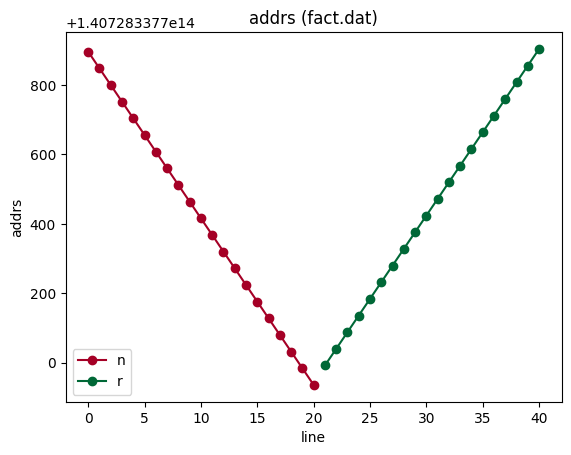

In [34]:
addrs_plt("fact.dat")

* 上記の例からはfact(10) -&gt; fact(9) -&gt; ... と呼ばれていくにつれアドレスが小さくなっていくことがわかる
* このように関数を呼び出すたびに, その関数のための新しいメモリ領域が確保されていく
* その領域が<font color="blue">「スタック」</font>と呼ばれるものであり, スレッドごとに割り当てられる
* 関数を呼び出すたびに新しいアドレスを使っていったのではすぐにメモリを使い果たしてしまうので, 関数が終了(リターン)したときにその領域は開放される(次の関数呼び出しが同じ領域を使う)
* その様子がわかるのが, 以下のような, 関数を2回呼び出すような関数

In [35]:
%%writefile local_fib.c
#include <stdio.h>

long fib(long n) {
  printf("n@fib(%ld) : %ld\n", n, (long)&n);
  if (n < 2) {
    return 1;
  } else {
    long x = fib(n - 1);
    long y = fib(n - 2);
    printf("x@fib(%ld) : %ld\n", n, (long)&x);
    printf("y@fib(%ld) : %ld\n", n, (long)&y);
    return x + y;
  }
}

int main() {
  long n = 10;
  long x = fib(n);
  printf("fib(%ld) = %ld\n", n, x);
  return 0;
}

Writing local_fib.c


In [36]:
gcc -Wall -Wno-format -o local_fib local_fib.c

In [37]:
./local_fib > fib.dat

/tmp/ipykernel_3011637/1364792577.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('RdYlGn', nvars)


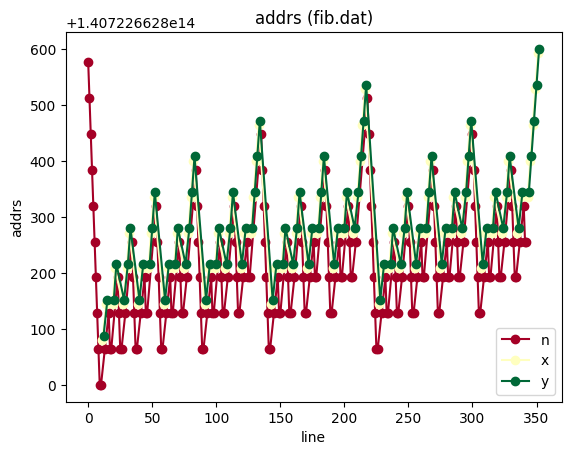

In [38]:
addrs_plt("fib.dat")

# 3. ポインタがよくわからないという人へ
* ポインタがよくわからないという人は, <font color="blue">「ポインタ」とは単純にアドレスのこと</font>だと思えば良い
* ポインタ変数 --- `char *` でも `int *` でも, `int **` でも, `void *` でも --- に入っているものは要するにアドレス, つまり整数である
* ポインタ変数`p`に対し, <font color="blue">`*p`という式はそのアドレスにロード命令を発行して取り出した値</font>のことになるし, <font color="blue">`*p = ...` という代入文はそのアドレスにストア命令を発行</font>する
* その意味ではポインタ変数はどれも似たようなもので, `char*`であろうが`int*`であろうが, アドレスはアドレス, 整数は整数, その意味ではどれも一緒である
* 違いは, 何のポインタであるかによって, `*p`としたときに何バイト分のデータを読んだり書いたりするかが違うだけである. 例えば`p`が`int *`であれば4バイト, `double *`であれば8バイト読む
* `p[i]`や`p->x`も似たようなもので, `p`が何へのポインタであるかによって, `p`から何バイト先を読むかが違う. `int*`であれば`p[i]`は `p`から$4i$番地だけ先の番地を読む(または書く)
* 以下は`*a`という式が機械語レベルでは何をしているかを示したもの

In [39]:
%%writefile pointer.c
int deref_int(int * a) {
  return *a;
}
long deref_long(long * a) {
  return *a;
}

Writing pointer.c


* 以下のコマンド(`-S`オプション)で機械語(正確にはアセンブリ言語)のコードが, pointer.s というファイルに生成される
  * `-O3` は最適化のオプションでこれを付けたほうが余計なものが生成されずわかりやすいコードになることを期待して付けている

In [40]:
gcc -S -O3 -Wall pointer.c

* 以下でそれを表示

In [41]:
cat -n pointer.s

     1		.file	"pointer.c"
     2		.text
     3		.p2align 4
     4		.globl	deref_int
     5		.type	deref_int, @function
     6	deref_int:
     7	.LFB0:
     8		.cfi_startproc
     9		endbr64
    10		movl	(%rdi), %eax
    11		ret
    12		.cfi_endproc
    13	.LFE0:
    14		.size	deref_int, .-deref_int
    15		.p2align 4
    16		.globl	deref_long
    17		.type	deref_long, @function
    18	deref_long:
    19	.LFB1:
    20		.cfi_startproc
    21		endbr64
    22		movq	(%rdi), %rax
    23		ret
    24		.cfi_endproc
    25	.LFE1:
    26		.size	deref_long, .-deref_long
    27		.ident	"GCC: (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0"
    28		.section	.note.GNU-stack,"",@progbits
    29		.section	.note.gnu.property,"a"
    30		.align 8
    31		.long	1f - 0f
    32		.long	4f - 1f
    33		.long	5
    34	0:
    35		.string	"GNU"
    36	1:
    37		.align 8
    38		.long	0xc0000002
    39		.long	3f - 2f
    40	2:
    41		.long	0x3
    42	3:
    43		.align 8
    44	4:


* `movl	(%rdi), %eax`は`%rdi`レジスタに入っているアドレスから4バイト (lはlong wordの意味. Intel機械語で4バイトの意味)読み込み`%eax`に入れる
* `movq	(%rdi), %rax`は`%rdi`レジスタに入っているアドレスから8バイト (qはquad wordの意味. Intel機械語で8バイトの意味)読み込み`%rax`に入れる

* 以下は`a[i]`の場合

In [42]:
%%writefile pointer_array.c
int idx_int(int * a, long i) {
  return a[i];
}
long idx_long(long * a, long i) {
  return a[i];
}

Writing pointer_array.c


In [43]:
gcc -S -O3 -Wall pointer_array.c

In [44]:
cat -n pointer_array.s

     1		.file	"pointer_array.c"
     2		.text
     3		.p2align 4
     4		.globl	idx_int
     5		.type	idx_int, @function
     6	idx_int:
     7	.LFB0:
     8		.cfi_startproc
     9		endbr64
    10		movl	(%rdi,%rsi,4), %eax
    11		ret
    12		.cfi_endproc
    13	.LFE0:
    14		.size	idx_int, .-idx_int
    15		.p2align 4
    16		.globl	idx_long
    17		.type	idx_long, @function
    18	idx_long:
    19	.LFB1:
    20		.cfi_startproc
    21		endbr64
    22		movq	(%rdi,%rsi,8), %rax
    23		ret
    24		.cfi_endproc
    25	.LFE1:
    26		.size	idx_long, .-idx_long
    27		.ident	"GCC: (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0"
    28		.section	.note.GNU-stack,"",@progbits
    29		.section	.note.gnu.property,"a"
    30		.align 8
    31		.long	1f - 0f
    32		.long	4f - 1f
    33		.long	5
    34	0:
    35		.string	"GNU"
    36	1:
    37		.align 8
    38		.long	0xc0000002
    39		.long	3f - 2f
    40	2:
    41		.long	0x3
    42	3:
    43		.align 8
    44	4:


* `movl	(%rdi,%rsi,4), %eax`は(`%rdi`に入っているアドレス + `%rsi` * 4)番地から4バイト読み込み, `%eax`に入れる命令
* `movq	(%rdi,%rsi,8), %rax`は(`%rdi`に入っているアドレス + `%rsi` * 8)番地から8バイト読み込み, `%rax`に入れる命令

* ポインタがよくわからないという人は, 「ポインタ」の実体は常に単なる整数(アドレス)で, `*p`, `p[i]`, `p->...`などはどれも, 適切にアドレスを計算してそこにアクセスするだけのこと, と思うのが良いのではないかと思う

* 以下は高級そうなことをしているように見えるかも知れないが, `p->next`は`p`に入っているアドレスそのもの, `p->x`は(多分)その8バイト先を読むだけのことである
* どれがfor文(ループ)に対応し, どれが`p->x`に対応し, どれが`p->next`に対応しているかを読み取ってみよ

In [45]:
%%writefile pointer_arrow.c
typedef struct node {
  struct node * next;
  long x;
} node_t;
long chase(node_t * a) {
  long s = 0;
  for (node_t * p = a; p; p = p->next) {
    s += p->x;
  }
  return s;
}

Writing pointer_arrow.c


In [46]:
gcc -S -O3 -Wall pointer_arrow.c

In [47]:
cat -n pointer_arrow.s

     1		.file	"pointer_arrow.c"
     2		.text
     3		.p2align 4
     4		.globl	chase
     5		.type	chase, @function
     6	chase:
     7	.LFB0:
     8		.cfi_startproc
     9		endbr64
    10		xorl	%eax, %eax
    11		testq	%rdi, %rdi
    12		je	.L4
    13		.p2align 4,,10
    14		.p2align 3
    15	.L3:
    16		addq	8(%rdi), %rax
    17		movq	(%rdi), %rdi
    18		testq	%rdi, %rdi
    19		jne	.L3
    20		ret
    21		.p2align 4,,10
    22		.p2align 3
    23	.L4:
    24		ret
    25		.cfi_endproc
    26	.LFE0:
    27		.size	chase, .-chase
    28		.ident	"GCC: (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0"
    29		.section	.note.GNU-stack,"",@progbits
    30		.section	.note.gnu.property,"a"
    31		.align 8
    32		.long	1f - 0f
    33		.long	4f - 1f
    34		.long	5
    35	0:
    36		.string	"GNU"
    37	1:
    38		.align 8
    39		.long	0xc0000002
    40		.long	3f - 2f
    41	2:
    42		.long	0x3
    43	3:
    44		.align 8
    45	4:


* 最後に, こんなコードに意味はないが, ポインタと整数が同じものであるということをことさら強調するために書いておく
* `movsbl 918, %eax`は紛れもなく, 918番地にある1バイトを読んで`%eax`レジスタに入れる命令

In [48]:
%%writefile pointer_is_integer.c
int main() {
  char * p = 918;
  return *p;
}

Writing pointer_is_integer.c


In [49]:
gcc -S -O3 -Wall pointer_is_integer.c

pointer_is_integer.c: In function ‘main’:
pointer_is_integer.c:2:14: warning: initialization of ‘char *’ from ‘int’ makes pointer from integer without a cast []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wint-conversion-Wint-conversion]8;;]
    2 |   char * p = 918;
      |              ^~~


In [50]:
cat -n pointer_is_integer.s

     1		.file	"pointer_is_integer.c"
     2		.text
     3		.section	.text.startup,"ax",@progbits
     4		.p2align 4
     5		.globl	main
     6		.type	main, @function
     7	main:
     8	.LFB0:
     9		.cfi_startproc
    10		endbr64
    11		movsbl	918, %eax
    12		ret
    13		.cfi_endproc
    14	.LFE0:
    15		.size	main, .-main
    16		.ident	"GCC: (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0"
    17		.section	.note.GNU-stack,"",@progbits
    18		.section	.note.gnu.property,"a"
    19		.align 8
    20		.long	1f - 0f
    21		.long	4f - 1f
    22		.long	5
    23	0:
    24		.string	"GNU"
    25	1:
    26		.align 8
    27		.long	0xc0000002
    28		.long	3f - 2f
    29	2:
    30		.long	0x3
    31	3:
    32		.align 8
    33	4:


* ポインタに関して「ここがわからない」という質問を歓迎します

# 4. メモリ領域の「寿命」
* C言語で使えるメモリとして大域変数・配列と局所変数・配列があることを見たが, 違いを端的に言うならば「いつからいつまで使えるか」が違う

|          | いつから   |いつまで    |
|----------|------------|------------|
| 大域変数 |プロセス開始|プロセス終了|
| 局所変数 |関数開始    |関数終了    |

* 両者が違うというのみならず, どちらも不自由である
* いつでも好きなときに割り当てることが出来, 好きなときに解放することが出来るメモリが必要
* それが「動的(実行時)に割り当てられるメモリ」で, 「ヒープ」と呼ばれることもある

* 以下のプログラムを実行して(わけのわからない)挙動を説明してみよ

In [51]:
%%writefile local_lifetime.c
#include <stdio.h>

double * f(double * a) {
  return a;
}
const int n = 30;
double * alloc() {
  double a[n];
  return f(a);
}

int main() {
  double * a = alloc();
  for (long i = 0; i < n; i++) {
    a[i] = i;
  }
  for (long i = 0; i < n; i++) {
    printf("a[%ld] = %f\n", i, a[i]);
  }
  return 0;
}

Writing local_lifetime.c


In [54]:
gcc -Wall -o local_lifetime local_lifetime.c

In [63]:
./local_lifetime

a[0] = 0.000000
a[1] = 0.000000
a[2] = 2.000000
a[3] = 0.000000
a[4] = 0.000000
a[5] = 0.000000
a[6] = 0.000000
a[7] = 0.000000
a[8] = 0.000000
a[9] = 0.000000
a[10] = 0.000000
a[11] = 0.000000
a[12] = 0.000000
a[13] = 0.000000
a[14] = 14.000000
a[15] = 0.000000
a[16] = 0.000000
a[17] = 0.000000
a[18] = 0.000000
a[19] = 0.000000
a[20] = 0.000000
a[21] = 0.000000
a[22] = 0.000000
a[23] = 0.000000
a[24] = 0.000000
a[25] = 0.000000
a[26] = 0.000000
a[27] = 0.000000
a[28] = 73373240490968618574265316549968076809957772214146361729269420929012994374924751248049668730804648178993287692294359888390533239076188836054450742406381805659968854303223248026200172065575793549773308920766404313264420814848.000000
a[29] = 20499945973085480386615552175596964471048200349438681079251543948703789932918575800351744864255083122726196729883189083306861440404898164016938502566286339939661876054317520414761068315715941213737760853384964866048.000000


# 5. ヒープ(動的に割り当てたメモリ)の番地の表示
* C言語でメモリを自由な時点で割り当てて自由な時点で開放できる --- 動的に割り当てられる --- のはmalloc/free, C++であればnew/deleteなど
* ほとんどあらゆる言語で, 呼び方(名前)は違えど提供されている
* malloとfreeの場合を上記の表に加えると以下のようになる

|          | いつから          |いつまで        |
|----------|-------------------|----------------|
| 大域変数 |プロセス開始       |プロセス終了    |
| 局所変数 |関数開始           |関数終了        |
| ヒープ   |mallocを呼んだとき |freeを呼んだとき|

* mallocはサイズ(バイト数)を与えて呼び出すと「その時空いていた領域のアドレス」を返してくれる
* アドレスを返すので, C言語では`void *`を返す

* 以下は約100MB (100000000バイト)のメモリを3回割り当てて返されたアドレスを表示する

In [64]:
%%writefile malloc.c
#include <stdio.h>
#include <stdlib.h>

int main(int argc, char ** argv) {
  long n = (argc > 1 ? atol(argv[1]) : 3);
  if (n > 1000) {
    fprintf(stderr, "n (%ld) too large (> 1000)\n", n);
  }
  printf("allocating 100MB %ld times\n");
  for (long i = 0; i < n; i++) {
    void * a = malloc(100 * 1000 * 1000);
    printf("a@main() :     %ld\n", a);
  }
}

Writing malloc.c


In [65]:
gcc -Wall -Wno-format -o malloc malloc.c

In [66]:
./malloc

allocating 100MB 140732794818232 times
a@main() :     140491314679824
a@main() :     140491214675984
a@main() :     140491114672144


* まずは表示された3つのアドレスの間隔がほぼ100000000であることを確認せよ
* 50回割り当ててそのアドレスを可視化する

In [67]:
./malloc 50 > malloc_50.dat

/tmp/ipykernel_3011637/1364792577.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('RdYlGn', nvars)


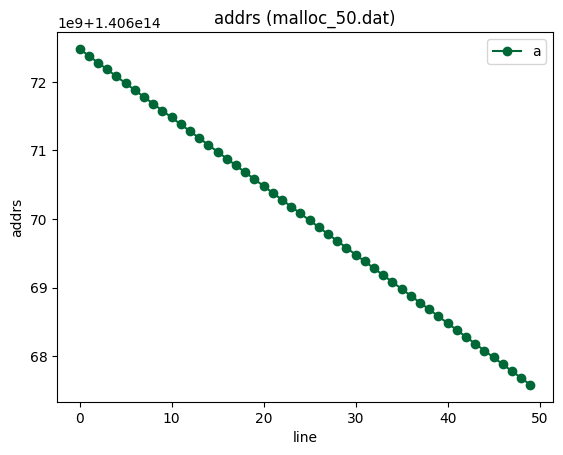

In [68]:
addrs_plt("malloc_50.dat")

* freeを一切呼んでいないので, 当然毎回異なるアドレスが返されている

* 以下は, 100MBの領域を50回確保しながら, 最後の10回以外の領域はfreeしている

In [69]:
%%writefile malloc_free.c
#include <stdio.h>
#include <stdlib.h>

int main(int argc, char ** argv) {
  long n = (argc > 1 ? atol(argv[1]) : 10);
  long repeat = (argc > 1 ? atol(argv[1]) : 5);
  if (n > 1000) {
    fprintf(stderr, "n (%ld) too large (> 1000)\n", n);
  }
  printf("allocate 100MB blocks %ld x %ld times, retaining %ld blocks\n",
         n, repeat, n);
  void * a[n];
  for (long r = 0; r < n; r++) {
    for (long i = 0; i < n; i++) {
      if (r > 0) free(a[i]);
      a[i] = malloc(100 * 1000 * 1000);
      printf("a@main() :     %ld\n", a[i]);
    }
  }
}

Writing malloc_free.c


In [70]:
gcc -Wall -Wno-format -o malloc_free malloc_free.c

In [71]:
./malloc_free 10 5 > malloc_10_5.dat

/tmp/ipykernel_3011637/1364792577.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('RdYlGn', nvars)


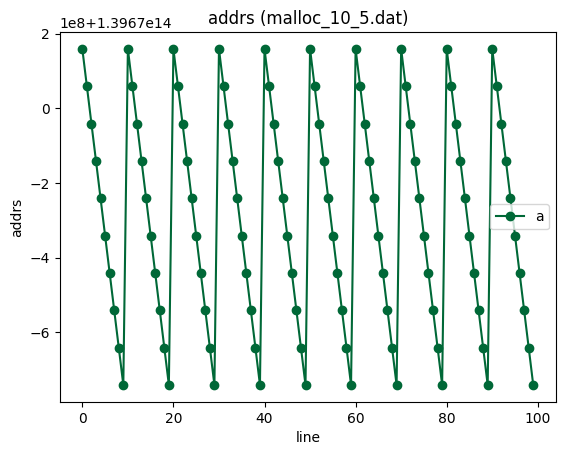

In [72]:
addrs_plt("malloc_10_5.dat")

# 6. 物理メモリを越えたメモリの割当て
* ところで先のプログラムは100MBのメモリを何度も割り当てる
* 以下は 100MB x 100 = 約10GBのメモリを割り当てる

In [73]:
./malloc 100 > malloc_100.dat

/tmp/ipykernel_3011637/1364792577.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('RdYlGn', nvars)


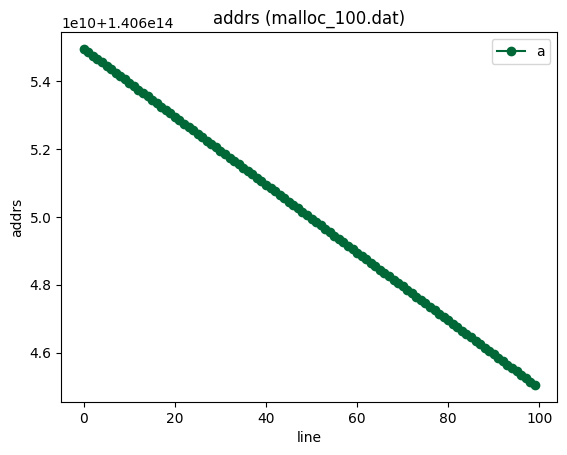

In [74]:
addrs_plt("malloc_100.dat")

* 以下は 100MB x 2000 = 約200GBのメモリを割り当てる

In [75]:
./malloc 2000 > malloc_2000.dat

n (2000) too large (> 1000)


/tmp/ipykernel_3011637/1364792577.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('RdYlGn', nvars)


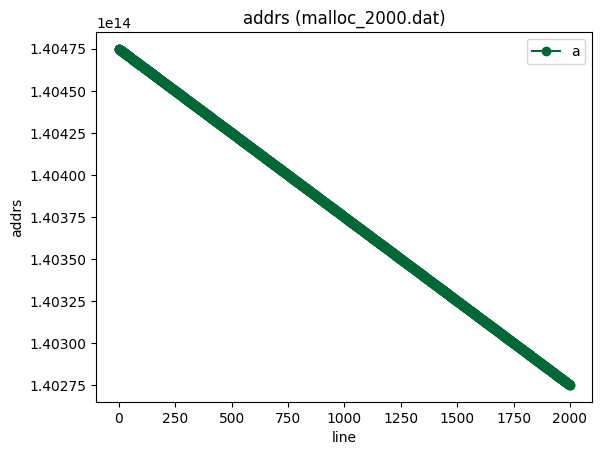

In [76]:
addrs_plt("malloc_2000.dat")

* Jupyter環境のサーバのメモリ搭載量は128GBだが, 200GB分のメモリ割り当てが成功している
* 成功しているのみならず非常に高速であることにも注意
* これらは, OSがメモリを要求されたときに, 実際には物理メモリを割り当てていない(要求時ページング)から可能になること
* この仕組みがOSのメモリ管理(仮想記憶)の真髄(次回)
* mallocではなく, システムコール(sbrk)を呼んでも同じことが起きる

In [77]:
%%writefile sbrk.c
#include <stdio.h>
#include <stdlib.h>

#include <unistd.h>
int main(int argc, char ** argv) {
  long n = (argc > 1 ? atol(argv[1]) : 3);
  if (n > 1000) {
    fprintf(stderr, "n (%ld) too large (> 1000)\n", n);
  }
  printf("allocating 100MB %ld times\n");
  for (long i = 0; i < n; i++) {
    void * a = sbrk(100 * 1000 * 1000);
    printf("a@main() :     %ld\n", a);
  }
}

Writing sbrk.c


In [78]:
gcc -Wall -Wno-format -o sbrk sbrk.c

In [79]:
./sbrk 2000 > sbrk_2000.dat

n (2000) too large (> 1000)


/tmp/ipykernel_3011637/1364792577.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('RdYlGn', nvars)


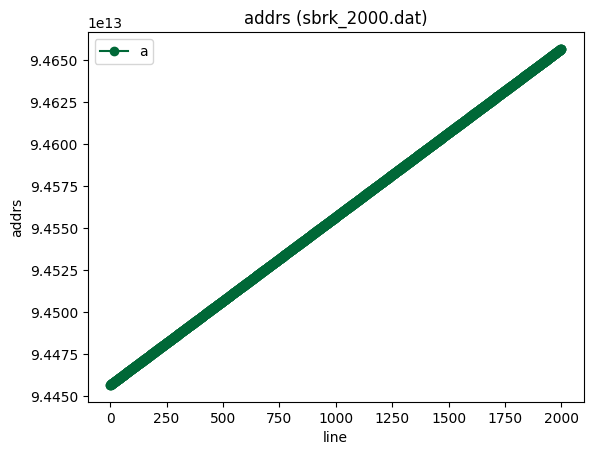

In [80]:
addrs_plt("sbrk_2000.dat")